## IMPORT REQUIRED LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD DATA

In [4]:
df= pd.read_csv("./data/clean_titanic.csv")

In [5]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


## ANALYZE AND VISUALIZE 'pclass' COLUMN

In [7]:
pclass=df['pclass'].value_counts()
pclass

pclass
3    709
1    323
2    277
Name: count, dtype: int64

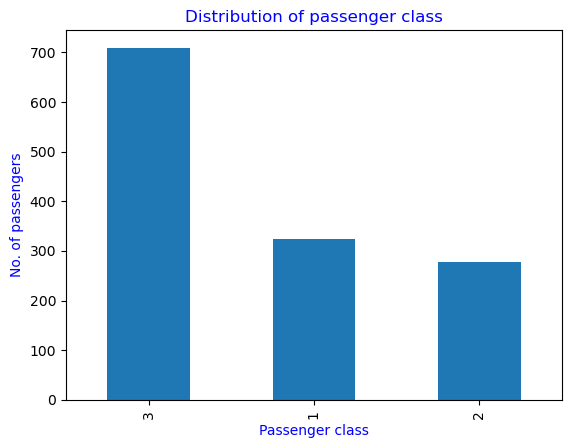

In [8]:
pclass.plot(kind="bar")
plt.xlabel("Passenger class",color="b")
plt.ylabel("No. of passengers",color="b")
plt.title("Distribution of passenger class",color="blue");

 - Passenger class 3 had **54.16%** passengers followed by 1 with **24.67%** then 2 with **21.16%**

**Question**
- Out of 1309, how many passengers survived? how many passengers from each passenger class survived?

## ANALYZE AND VISUALIZE 'survived' BY 'pclass'

In [11]:
survived=df['survived'].value_counts()
survived

survived
0    809
1    500
Name: count, dtype: int64

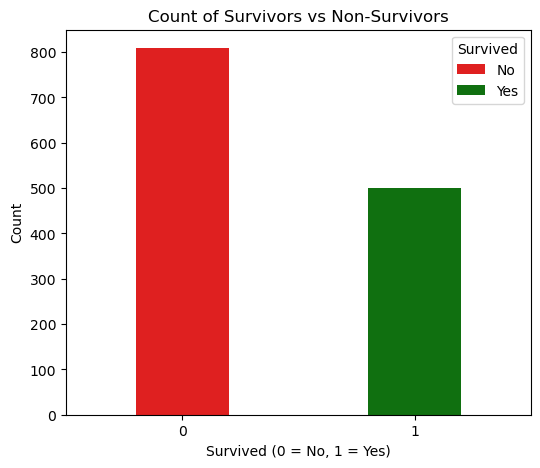

In [12]:
plt.figure(figsize=(6, 5))
sns.countplot(x="survived", data=df, palette=['red', 'green'],width=0.4, hue="survived")
plt.title('Count of Survivors vs Non-Survivors')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title="Survived", labels=['No', 'Yes'])
plt.show()

# sns.barplot(x=survived.index, y=survived.values, palette=['red', 'green'],width=0.4, hue=survived.index)
# with this the legend won't match with the palette, you'll have to create a manual legend which may be complex. 
#so, the best option is using countplot()

- **38.2%** of passengers survived while **61.80%** did not survive.

### alternative of the code

In [15]:
import pandas as pd

counts_per_class_table = pd.crosstab(df['pclass'], df['survived'])
counts_per_class_table.columns = ['Non-Survivors', 'Survived']  # Rename columns
print(counts_per_class_table)


        Non-Survivors  Survived
pclass                         
1                 123       200
2                 158       119
3                 528       181


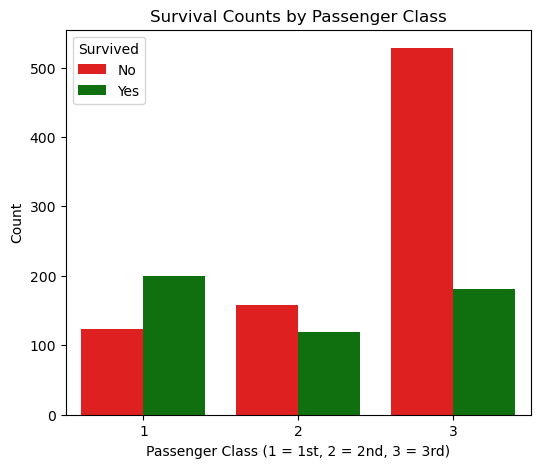

In [16]:
plt.figure(figsize=(6, 5))
sns.countplot(x='pclass', hue='survived', data=df, palette=['red', 'green'])

plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

 **PASSENGER CLASS 1**

- **61.92%** of passengers survived.

**PASSENGER CLASS 2**

- **42.96%** of passengers survived.

**PASSENGER CLASS 3**

- **25.53%** of passengers survived.

**OVERALL % DISTRIBUTION OF SURVIVORS AMONG THE 3 CLASSES**

- **40%** of survivors were from passenger class 1.

- **36.2%** of survivors were from passenger class 3.

- **23.8%** of survivors were from passenger class 2.

  **Question**

Why does 1st class have higher rate of survival while 3rd class has a lower rate of survival?




## ANALYZE AND VISUALIZE 'sex' COLUMN

In [19]:
gender= df['sex'].value_counts()
gender

sex
male      843
female    466
Name: count, dtype: int64

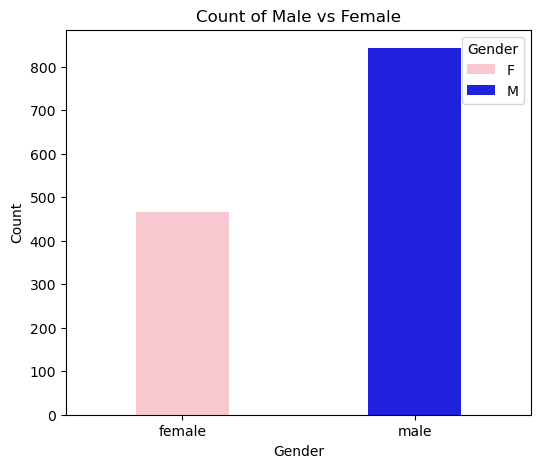

In [20]:
plt.figure(figsize=(6, 5))
sns.countplot(x="sex", data=df, palette=['pink', 'blue'],width=0.4, hue="sex")
plt.title('Count of Male vs Female')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title="Gender", labels=['F', 'M'])
plt.show()

- **64.40%** of passengers were male while **35.60%** were female.

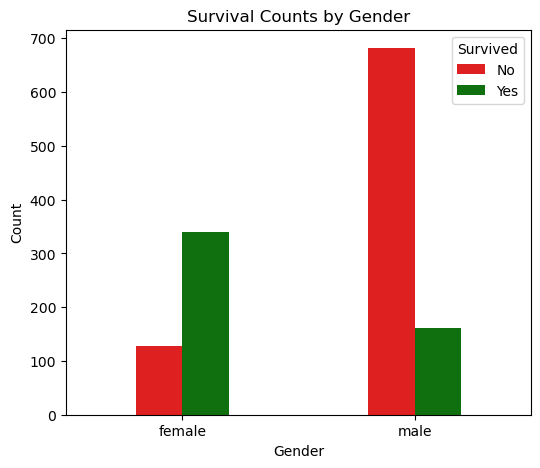

In [22]:
plt.figure(figsize=(6, 5))
sns.countplot(x='sex', hue='survived', data=df,width=0.4, palette=['red', 'green'])

plt.title('Survival Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

In [23]:
gender_survival_table= pd.crosstab(df['sex'],df['survived'])
gender_survival_table.columns=['survivors','non-survivors']
gender_survival_table

,survivors,non-survivors
sex,,
female,127,339
male,682,161


- **67.8%** of survivors were female.
- **32.2%** of survivors were male.

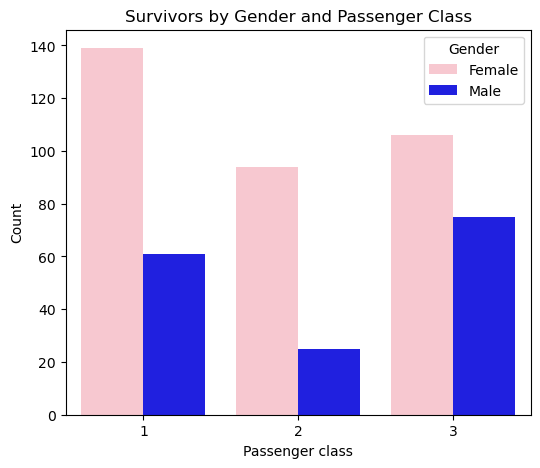

In [50]:
plt.figure(figsize=(6, 5))
sns.countplot(x='pclass', hue='sex', data=df[df['survived']==1], palette=['pink', 'blue'])

plt.title('Survivors by Gender and Passenger Class')
plt.xlabel('Passenger class')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])

plt.show()

- In each passenger class, majority of survivors were female.

- Among the 3 classes, 1st class had majority of survivors, followed by 3rd class then 2nd class.

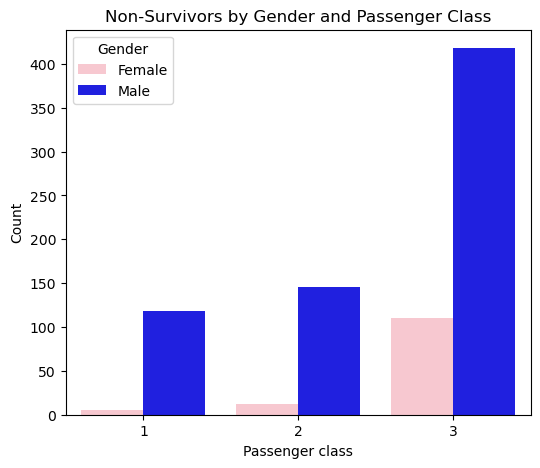

In [54]:
plt.figure(figsize=(6, 5))
sns.countplot(x='pclass', hue='sex', data=df[df['survived']==0], palette=['pink', 'blue'])

plt.title('Non-Survivors by Gender and Passenger Class')
plt.xlabel('Passenger class')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])

plt.show()